<h4> $\texttt{Joseph High}$ </h4>
$\texttt{UNI: jph2185}$

<h1>Citibike Network Assignment</h1>
<li>The file, 201809-citibike-tripdata.csv, contains citibike trip data from September 2018 (a reasonable sized file!)
<li>The data:<br>
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
<li>Each record in the data is a trip 
<li>The data is described at https://www.citibikenyc.com/system-data

<h1>STEP 1: Read the data into a dataframe</h1>
<li>Convert station ids to str if necessary

In [1]:
import pandas as pd
import numpy as np
datafile = "201801-citibike-tripdata.csv"
df = pd.read_csv(datafile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             718994 non-null  int64  
 1   starttime                718994 non-null  object 
 2   stoptime                 718994 non-null  object 
 3   start station id         718994 non-null  int64  
 4   start station name       718994 non-null  object 
 5   start station latitude   718994 non-null  float64
 6   start station longitude  718994 non-null  float64
 7   end station id           718994 non-null  int64  
 8   end station name         718994 non-null  object 
 9   end station latitude     718994 non-null  float64
 10  end station longitude    718994 non-null  float64
 11  bikeid                   718994 non-null  int64  
 12  usertype                 718994 non-null  object 
 13  birth year               718994 non-null  int64  
 14  gend

<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row (none in this file but others do have nans)
<li>and convert stationids to str 

In [2]:
df.dropna(axis=0,how='any',inplace=True)
df['start station id'] = df['start station id'].astype(str)
df['end station id'] = df['end station id'].astype(str)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718994 entries, 0 to 718993
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             718994 non-null  int64  
 1   starttime                718994 non-null  object 
 2   stoptime                 718994 non-null  object 
 3   start station id         718994 non-null  object 
 4   start station name       718994 non-null  object 
 5   start station latitude   718994 non-null  float64
 6   start station longitude  718994 non-null  float64
 7   end station id           718994 non-null  object 
 8   end station name         718994 non-null  object 
 9   end station latitude     718994 non-null  float64
 10  end station longitude    718994 non-null  float64
 11  bikeid                   718994 non-null  int64  
 12  usertype                 718994 non-null  object 
 13  birth year               718994 non-null  int64  
 14  gend

In [4]:
# type(df['start station id'][1])
type(df['end station id'][1])

str

Now, the elements within the start station id and end station id columns are of type string.

In [5]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718989,843,2018-01-31 17:28:27.5390,2018-01-31 17:42:30.5890,3664,North Moore St & Greenwich St,40.720195,-74.010301,410,Suffolk St & Stanton St,40.720664,-73.985180,15153,Subscriber,1981,1
718990,244,2018-01-31 17:34:20.4510,2018-01-31 17:38:24.7200,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,26896,Subscriber,1960,1
718991,302,2018-01-31 18:20:55.5430,2018-01-31 18:25:58.3350,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,33111,Subscriber,1965,1
718992,222,2018-01-31 18:47:42.5720,2018-01-31 18:51:24.6830,3664,North Moore St & Greenwich St,40.720195,-74.010301,257,Lispenard St & Broadway,40.719392,-74.002472,16675,Subscriber,1969,0


<h1>STEP 3: Write a function that returns a graph given a citibike data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe

In [6]:
def get_citibike_graph(df):
    import networkx as nx
    G = nx.Graph()
    node_names = dict()

    #YOUR CODE GOES HERE
    for i in df.index:
        in_node = df['start station id'][i]
        out_node = df['end station id'][i]
        in_node_name = df['start station name'][i]
        out_node_name = df['end station name'][i]
        
        node_names[in_node]= in_node_name
        node_names[out_node] = out_node_name
        
        trip_duration = df['tripduration'][i]
        
        # The time attribute is temporarily stored as the total time duration over all trips.
        # The average time duration is computed in the next for-loop.
        if G.has_edge(in_node, out_node):
            G[in_node][out_node]['trips'] += 1
            trip_count = G[in_node][out_node]['trips']
            G[in_node][out_node]['time'] += trip_duration
        else:
            G.add_edge(in_node,out_node, trips = 1, time=trip_duration)
    
    # Compute the average duration and update the time attribute in the edge data with this value.
    for e in G.edges():
        total_time = G[e[0]][e[1]]['time']
        trip_count = G[e[0]][e[1]]['trips']
        G[e[0]][e[1]]['time'] = total_time/trip_count
        
    return G,node_names
    

In [7]:
# Testing function
get_citibike_graph(df)

(<networkx.classes.graph.Graph at 0x7f807848e9d0>,
 {'72': 'W 52 St & 11 Ave',
  '505': '6 Ave & W 33 St',
  '3255': '8 Ave & W 31 St',
  '525': 'W 34 St & 11 Ave',
  '447': '8 Ave & W 52 St',
  '3356': 'Amsterdam Ave & W 66 St',
  '482': 'W 15 St & 7 Ave',
  '228': 'E 48 St & 3 Ave',
  '173': 'Broadway & W 49 St',
  '479': '9 Ave & W 45 St',
  '450': 'W 49 St & 8 Ave',
  '347': 'Greenwich St & W Houston St',
  '127': 'Barrow St & Hudson St',
  '3635': 'W 36 St & 9 Ave',
  '457': 'Broadway & W 58 St',
  '523': 'W 38 St & 8 Ave',
  '514': '12 Ave & W 40 St',
  '478': '11 Ave & W 41 St',
  '484': 'W 44 St & 5 Ave',
  '490': '8 Ave & W 33 St',
  '500': 'Broadway & W 51 St',
  '477': 'W 41 St & 8 Ave',
  '3466': 'W 45 St & 6 Ave (OLD)',
  '529': 'W 42 St & 8 Ave',
  '3459': 'E 53 St & 3 Ave',
  '3236': 'W 42 St & Dyer Ave',
  '3233': 'E 48 St & 5 Ave',
  '465': 'Broadway & W 41 St',
  '487': 'E 20 St & FDR Drive',
  '469': 'Broadway & W 53 St',
  '359': 'E 47 St & Park Ave',
  '379': 'W 31

In [8]:
# Checking edge data returned by get_citibike_graph
# G_test = get_citibike_graph(df)[0]
# G_test.edges(data=True)

<h1>STEP 4: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>m_G: A graph containing only data from male riders
<li>f_G: A graph containing only data from female riders
<li>Note: for m_G and f_G you will need to extract data from the dataframe

In [9]:
G,nodes=get_citibike_graph(df)

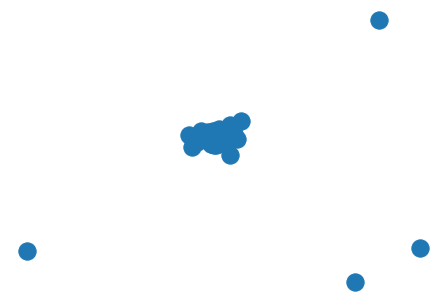

In [10]:
import networkx as nx
%matplotlib inline
nx.draw(G)

In [12]:
m_df = df[df.gender==1]
f_df = df[df.gender==2]

In [13]:
m_G = get_citibike_graph(m_df)[0]
f_G = get_citibike_graph(f_df)[0]

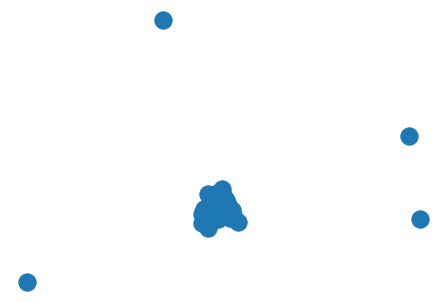

In [14]:
%matplotlib inline
nx.draw(m_G)

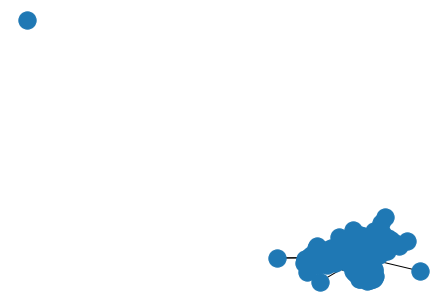

In [15]:
%matplotlib inline
nx.draw(f_G)

<h1>STEP 5: Answer the following questions for each of the graphs</h1>
<ol>
<li>Which station (name) is the best connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs. Report both the two stations as well as the time in minutes
<li>Which edge is associated with the most number of trips?
<li>Which station is the most central?
<li>Which node is a bottleneck node?

Which station (name) has the greatest number of connections (max degree)?

In [16]:
G_deg = nx.degree(G)
G_deg_list =list(G_deg)
max_deg_G=max(G_deg_list,key=lambda x: x[1]) 
max_node_G = nodes.get(max_deg_G[0])

m_deg = nx.degree(m_G)
m_deg_list =list(m_deg)
max_deg_mG=max(m_deg_list,key=lambda x: x[1]) 
max_node_mG = nodes.get(max_deg_mG[0])

f_deg = nx.degree(f_G)
f_deg_list =list(f_deg)
max_deg_fG=max(f_deg_list,key=lambda x: x[1]) 
max_node_fG = nodes.get(max_deg_fG[0])

In [17]:
print('Busiest station: ', max_node_G)
print('Busiest male station: ', max_node_mG)
print('Busiest female station: ', max_node_fG)

Busiest station:  Pershing Square North
Busiest male station:  Pershing Square North
Busiest female station:  Pershing Square North


Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [18]:
#Note: I've printed the max edges but you don't need to print them
G_edge_data = list(G.edges(data=True))
G_max_time_edge = max(G_edge_data, key=lambda x: x[2]['time'])
G_node1,G_node2 = nodes.get(G_max_time_edge[0]),nodes.get(G_max_time_edge[1])

m_edge_data = list(m_G.edges(data=True))
m_max_time_edge = max(m_edge_data, key=lambda x: x[2]['time'])
m_node1,m_node2 = nodes.get(m_max_time_edge[0]),nodes.get(m_max_time_edge[1])

f_edge_data = list(f_G.edges(data=True))
f_max_time_edge = max(f_edge_data, key=lambda x: x[2]['time'])
f_node1,f_node2 = nodes.get(f_max_time_edge[0]),nodes.get(f_max_time_edge[1])

In [19]:
print("Longest average duration males: ",m_node1, " to ",m_node2,".\nAverage duration:",
      int(m_max_time_edge[2]['time']),"\n")
print("Longest average duration females: ",f_node1, " to ",f_node2,".\nAverage duration:",
      int(f_max_time_edge[2]['time']),"\n")
print("Longest average duration all: ",G_node1, " to ",G_node2,".\nAverage duration:",
      int(G_max_time_edge[2]['time']),"\n")

Longest average duration males:  Nassau St & Navy St  to  Hope St & Union Ave .
Average duration: 19510049 

Longest average duration females:  Adelphi St & Myrtle Ave  to  NYCBS Depot - 3AV .
Average duration: 4421929 

Longest average duration all:  Nassau St & Navy St  to  Hope St & Union Ave .
Average duration: 19510049 



Which edge is associated with the most number of trips?

In [20]:
G_edge_data = list(G.edges(data=True))
G_max_count_edge = max(G_edge_data, key=lambda x: x[2]['trips'])
G_count_max1, G_count_max2 = nodes.get(G_max_count_edge[0]),nodes.get(G_max_count_edge[1])

m_edge_data = list(m_G.edges(data=True))
m_max_count_edge = max(m_edge_data, key=lambda x: x[2]['trips'])
m_count_max1, m_count_max2 = nodes.get(m_max_count_edge[0]),nodes.get(m_max_count_edge[1])

f_edge_data = list(f_G.edges(data=True))
f_max_count_edge = max(f_edge_data, key=lambda x: x[2]['trips'])
f_count_max1, f_count_max2 = nodes.get(f_max_count_edge[0]),nodes.get(f_max_count_edge[1])

In [21]:
print("Most trip routes for males: ",m_count_max1, " to ",m_count_max2, ".\nNumber of trips:", 
      m_max_count_edge[2]['trips'],"\n")
print("Most trip routes for females: ",f_count_max1, " to ",f_count_max2, ".\nNumber of trips:", 
      f_max_count_edge[2]['trips'],"\n")
print("Most trip routes for all: ",G_count_max1, " to ",G_count_max2, ".\nNumber of trips:", 
      G_max_count_edge[2]['trips'],"\n")

Most trip routes for males:  Cooper Square & Astor Pl  to  E 7 St & Avenue A .
Number of trips: 533 

Most trip routes for females:  E 7 St & Avenue A  to  Cooper Square & Astor Pl .
Number of trips: 161 

Most trip routes for all:  Cooper Square & Astor Pl  to  E 7 St & Avenue A .
Number of trips: 700 



<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.
<li>Which node is a possible bottleneck node in terms of bike flows?
<li>Which node is the "nearest" to all other nodes (irrespective of flows)
<li>Which node is the "nearest" to all other nodes (in terms of distance = time)


In [22]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import betweenness_centrality

bc_G = betweenness_centrality(G)
bc_m = betweenness_centrality(m_G)
bc_f = betweenness_centrality(f_G)

cc_G = closeness_centrality(G)
cc_m = closeness_centrality(m_G)
cc_f = closeness_centrality(f_G)

cct_G = closeness_centrality(G,distance='time')
cct_m = closeness_centrality(m_G,distance='time')
cct_f = closeness_centrality(f_G,distance='time')

In [23]:
bc_G_max = max(bc_G.items(), key=lambda x:x[1])
bc_m_max = max(bc_m.items(), key=lambda x:x[1])
bc_f_max = max(bc_f.items(), key=lambda x:x[1])

cc_G_max = max(cc_G.items(), key=lambda x:x[1])
cc_m_max = max(cc_m.items(), key=lambda x:x[1])
cc_f_max = max(cc_f.items(), key=lambda x:x[1])

cct_G_max = max(cct_G.items(), key=lambda x:x[1])
cct_m_max = max(cct_m.items(), key=lambda x:x[1])
cct_f_max = max(cct_f.items(), key=lambda x:x[1])

In [24]:
print('Centrality for entire graph (for all)')
print('-------------------------------------')
print('Possible bottleneck node for all: ', nodes.get(bc_G_max[0]))
print('Most central in connectivity for all: ', nodes.get(cc_G_max[0]))
print('Most central in connectivity using time as distance for all: ', nodes.get(cct_G_max[0]),"\n\n")

print('Centrality for male graph')
print('--------------------------')
print('Possible bottleneck node for males: ', nodes.get(bc_m_max[0]))
print('Most central in connectivity for males: ', nodes.get(cc_m_max[0]))
print('Most central in connectivity using time as distance for males: ', nodes.get(cct_m_max[0]),"\n\n")

print('Centrality for female graph')
print('----------------------------')
print('Possible bottleneck node for females: ', nodes.get(bc_f_max[0]))
print('Most central in connectivity for females: ', nodes.get(cc_f_max[0]))
print('Most central in connectivity using time as distance for females: ', nodes.get(cct_f_max[0]),"\n")

Centrality for entire graph (for all)
-------------------------------------
Possible bottleneck node for all:  1 Ave & E 62 St
Most central in connectivity for all:  Pershing Square North
Most central in connectivity using time as distance for all:  E 4 St & 2 Ave 


Centrality for male graph
--------------------------
Possible bottleneck node for males:  Queens Plaza North & Crescent St
Most central in connectivity for males:  Pershing Square North
Most central in connectivity using time as distance for males:  E 2 St & 2 Ave 


Centrality for female graph
----------------------------
Possible bottleneck node for females:  Queens Plaza North & Crescent St
Most central in connectivity for females:  Pershing Square North
Most central in connectivity using time as distance for females:  Stanton St & Chrystie St 

